## Import bibliotek.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns # wizualizacje w Python
from sklearn.linear_model import LinearRegression # regresja liniowa SKLEARN
from sklearn.model_selection import train_test_split # funkcja do podziału zbioru
from sklearn.metrics import mean_squared_error # metryka z której skorzystamy
from statsmodels.formula.api import ols # regresja liniowa / metoda najmniejszych kwadratów STATSMODELS
import matplotlib.pyplot as plt # wizualizacje w Python

## Ćwiczenie 1.
Wczytajamy zbiory dotyczące danych sprzedażowych "Produktu A".

In [2]:
tr = pd.read_parquet('dane/tr.parquet')
va = pd.read_parquet('dane/va.parquet')

#### 1.1. Zbuduj pusty model regresji liniowej, tylko z wyrazem wolnym. Będzie on naszym punktem odniesienia dla kolejnych modeli.

In [3]:
model_0 = ols(formula='sprzedaz ~ 1',
              data=tr).fit()
print(model_0.summary())
pred_tr = model_0.predict(tr)
pred_va = model_0.predict(va)

mse_tr = mean_squared_error(tr.sprzedaz, pred_tr, squared=False)
mse_va = mean_squared_error(va.sprzedaz, pred_va, squared=False)

print('MSE TR: {}'.format(np.round(mse_tr, 2)))
print('MSE VA: {}'.format(np.round(mse_va, 2)))

                            OLS Regression Results                            
Dep. Variable:               sprzedaz   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 29 Jul 2023   Prob (F-statistic):                nan
Time:                        09:11:07   Log-Likelihood:            -1.3983e+05
No. Observations:               49680   AIC:                         2.797e+05
Df Residuals:                   49679   BIC:                         2.797e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8678      0.018    213.526      0.0

#### 1.2. Dodaj do modelu najbardziej perspektywiczną zmienną. 

**Zanim zaczniesz, przeczytaj proszę wnioski z poprzednich zajęć, które podsumowałem poniżej.**

---
Dla przypomnienia, wnioski z poprzednich zajęć i analizy zbioru uczącego:
* Najmocniej skorelowana ze zmienną celu: "srednia_sprzedaz_0_13d" - 0.783053
* Ze zmienną "srednia_sprzedaz_0_13d" wysoce skorelowane są zmienne: srednia_sprzedaz_0_2d, srednia_sprzedaz_0_6d
* Zmienne do sprawdzenia:
    * "srednia_cena_ropy_0_6d" - mocniej skorelowana ze zmienną celu niż srednia_cena_ropy_0_29d
    * "rok_dzialalnosci" - z każdym rokiem sprzedaż nieco wzrasta.
    * Pozostałe zmienne oparte na dacie: święta, weekendy, etc.
---

In [15]:
model_0 = ols(formula='sprzedaz ~ srednia_sprzedaz_0_13d',
              data=tr).fit()
print(model_0.summary())
pred_tr = model_0.predict(tr)
pred_va = model_0.predict(va)

mse_tr = mean_squared_error(tr.sprzedaz, pred_tr, squared=False)
mse_va = mean_squared_error(va.sprzedaz, pred_va, squared=False)

print('MSE TR: {}'.format(np.round(mse_tr, 2)))
print('MSE VA: {}'.format(np.round(mse_va, 2)))

                            OLS Regression Results                            
Dep. Variable:               sprzedaz   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                 7.875e+04
Date:                Sat, 29 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:16:46   Log-Likelihood:            -1.1623e+05
No. Observations:               49680   AIC:                         2.325e+05
Df Residuals:                   49678   BIC:                         2.325e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

#### 1.3. Spróbuj dodać do modelu kolejną zmienną, która podczas EDA była perspektywiczna.

Zwróć uwagę na współczynniki modelu i p-value. Zdecyduj, czy zmienna powinna zostać  modelu, czy też nie.

In [34]:
model_0 = ols(formula='sprzedaz ~ srednia_sprzedaz_0_13d + srednia_cena_ropy_0_6d',
              data=tr).fit()
print(model_0.summary())
pred_tr = model_0.predict(tr)
pred_va = model_0.predict(va)

mse_tr = mean_squared_error(tr.sprzedaz, pred_tr, squared=False)
mse_va = mean_squared_error(va.sprzedaz, pred_va, squared=False)

print('MSE TR: {}'.format(np.round(mse_tr, 2)))
print('MSE VA: {}'.format(np.round(mse_va, 2)))

                            OLS Regression Results                            
Dep. Variable:               sprzedaz   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                 3.937e+04
Date:                Sat, 29 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:29:30   Log-Likelihood:            -1.1623e+05
No. Observations:               49680   AIC:                         2.325e+05
Df Residuals:                   49677   BIC:                         2.325e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

#### 1.4. Ceny ropy nie zadziałały? Spróbujmy zatem dodać do modelu zmienną "swieto". Działa? 
* Zwróć uwagę na współczynnik przy nije stojący. Jak można zinterpretować jego wartość i kierunek oddziaływania na zmienną celu?
* Sprawdź również p-value dla nowej zmienne i dla całego modelu oraz wyniki uzyskane na zbiorach TR i VA, by zdecydować czy nowa zmienna przyniosła korzyści.

In [20]:
model_0 = ols(formula='sprzedaz ~ srednia_sprzedaz_0_13d + swieto',
              data=tr).fit()
print(model_0.summary())
pred_tr = model_0.predict(tr)
pred_va = model_0.predict(va)

mse_tr = mean_squared_error(tr.sprzedaz, pred_tr, squared=False)
mse_va = mean_squared_error(va.sprzedaz, pred_va, squared=False)

print('MSE TR: {}'.format(np.round(mse_tr, 2)))
print('MSE VA: {}'.format(np.round(mse_va, 2)))

                            OLS Regression Results                            
Dep. Variable:               sprzedaz   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                 4.468e+04
Date:                Sat, 29 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:21:23   Log-Likelihood:            -1.1426e+05
No. Observations:               49680   AIC:                         2.285e+05
Df Residuals:                   49677   BIC:                         2.286e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

#### 1.5. Dodaj do modelu jedną ze zmiennych: "dzien_tygodni", "weekend".

ps. Jednej z nich nie będziemy mogli dodać. Postaraj się uargumentować czemu.

ps2. Spróbuj dodać obie zmienne do modelu i zobacz co się stanie.

In [22]:
model_0 = ols(formula='sprzedaz ~ srednia_sprzedaz_0_13d + dzien_tygodnia',
              data=tr).fit()
print(model_0.summary())
pred_tr = model_0.predict(tr)
pred_va = model_0.predict(va)

mse_tr = mean_squared_error(tr.sprzedaz, pred_tr, squared=False)
mse_va = mean_squared_error(va.sprzedaz, pred_va, squared=False)

print('MSE TR: {}'.format(np.round(mse_tr, 2)))
print('MSE VA: {}'.format(np.round(mse_va, 2)))

                            OLS Regression Results                            
Dep. Variable:               sprzedaz   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                 1.172e+04
Date:                Sat, 29 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:21:51   Log-Likelihood:            -1.1561e+05
No. Observations:               49680   AIC:                         2.312e+05
Df Residuals:                   49672   BIC:                         2.313e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

#### 1.6. Dodaj do modelu zmienną "typ_drogerii".
* Zbadaj efekt oddziaływania na zmienną celu.
* Drogerie którego typu sprzedają najwięcej?

In [35]:
model_0 = ols(formula='sprzedaz ~ srednia_sprzedaz_0_13d + swieto + typ_drogerii',
              data=tr).fit()
print(model_0.summary())
pred_tr = model_0.predict(tr)
pred_va = model_0.predict(va)

mse_tr = mean_squared_error(tr.sprzedaz, pred_tr, squared=False)
mse_va = mean_squared_error(va.sprzedaz, pred_va, squared=False)

print('MSE TR: {}'.format(np.round(mse_tr, 2)))
print('MSE VA: {}'.format(np.round(mse_va, 2)))

                            OLS Regression Results                            
Dep. Variable:               sprzedaz   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                 1.504e+04
Date:                Sat, 29 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:34:08   Log-Likelihood:            -1.1411e+05
No. Observations:               49680   AIC:                         2.282e+05
Df Residuals:                   49673   BIC:                         2.283e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1

#### 1.7. Utwórz w modelu interakcje.
* Bazuj na zmiennych, które już są w modelu.
* Bez korzystania z wykresów, zastanów się jak połączyć dostępne zmienne. Poeksperymentuj analizując wartości p-values i błędy predykcji.

In [36]:
model_0 = ols(formula='sprzedaz ~ srednia_sprzedaz_0_13d:swieto:weekend:swieto + typ_drogerii',
              data=tr).fit()
print(model_0.summary())
pred_tr = model_0.predict(tr)
pred_va = model_0.predict(va)

mse_tr = mean_squared_error(tr.sprzedaz, pred_tr, squared=False)
mse_va = mean_squared_error(va.sprzedaz, pred_va, squared=False)

print('MSE TR: {}'.format(np.round(mse_tr, 2)))
print('MSE VA: {}'.format(np.round(mse_va, 2)))

                            OLS Regression Results                            
Dep. Variable:               sprzedaz   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                 1.302e+04
Date:                Sat, 29 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:35:46   Log-Likelihood:            -1.1174e+05
No. Observations:               49680   AIC:                         2.235e+05
Df Residuals:                   49671   BIC:                         2.236e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

#### 1.8. Czy sprzedaż może być ujemna?
* Sprawdź predykcje ostatniego modelu.
* Z czego wynikają te wartości. Spróbuj to wyjaśnić na podstawie wiedzy, którą dysponujesz.
* Postaraj się "naprawić" predykcje i sprawdź jak zmienił się wynik modelu.

In [37]:
np.min(pred_tr)

-0.6607139840761431

## Ćwiczenie 2.
Twoim celem będzie wyjaśnienie/zamodelowanie zmiennej celu - "salary_in_usd".

Wczytaj dane o zarobkach w branży Data Science.

In [38]:
zarobki_ds = pd.read_csv('dane/data_science_salaries.csv')
zarobki_ds = zarobki_ds[zarobki_ds.salary_in_usd < 300000]

#### 2.1. Korzystając z funkcji `train_test_split` podziel zbiór na 3 części: zarobki_tr, zarobki_va, zarobki_te (proporcje 2:1:1, `random_state`=2001).

In [39]:
zarobki_tr, zarobki_va = train_test_split(zarobki_ds, train_size=0.5, random_state=2001)
zarobki_va, zarobki_te = train_test_split(zarobki_va, train_size=0.5, random_state=2001)

#### 2.2. Zbuduj model bazowy, tzw. "baseline". Niech zawiera on jedynie "Intercept".

Kilka uwag:
* Weryfikuj wyniki modelu za pomocą zbiorów: zarobki_tr i zarobki_va. Zbiór zarobki_te zostaw na finalną weryfikację jakości modelu.
* Sprawdzaj jakość predykcji za pomocą metryki `mean_squared_error` z parametrem `squared=False`.

In [40]:
model_0 = ols(formula='salary_in_usd ~ 1',
              data=zarobki_tr).fit()
print(model_0.summary())
pred_tr = model_0.predict(zarobki_tr)
pred_va = model_0.predict(zarobki_va)

mse_tr = mean_squared_error(zarobki_tr.salary_in_usd, pred_tr, squared=False)
mse_va = mean_squared_error(zarobki_va.salary_in_usd, pred_va, squared=False)

print('MSE TR: {}'.format(np.round(mse_tr, 3)))
print('MSE VA: {}'.format(np.round(mse_va, 3)))

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 03 Aug 2023   Prob (F-statistic):                nan
Time:                        15:52:32   Log-Likelihood:                -36019.
No. Observations:                2904   AIC:                         7.204e+04
Df Residuals:                    2903   BIC:                         7.205e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.438e+05   1093.900    131.496      0.0

#### 2.3. Iteracyjnie rozwijaj model. 
* Zwróć uwagę, że zbiór zawiera (poza zmienną celu) same zmienne kategoryczne.
    * Użyć 2-4 najmocniejszych zmiennych.
    * Ogranicz skomplikowanie modeli - nie dopuść, by model zawierał więcej niż 10 poziomów zmiennych.
* Gdy będziesz mieć pewność, że masz model odpowiedniej jakości, sprawdź go na zbiorze zarobki_te.

In [43]:
zarobki_tr.columns
zarobki_tr = zarobki_tr.copy()
zarobki_va = zarobki_va.copy()
zarobki_te = zarobki_te.copy()
# zmienna "remote_ratio" jest zmienną niemonotoniczną, a więc zarobki nie wzrastają,
    # ani nie maleją wraz ze wzrostem, 
    # albo spadkiem wartości tej zmiennej. 
    # Lepiej zatem ją przedstawić, jako zmienną kategoryczną.
zarobki_tr['remote_ratio'] = zarobki_tr['remote_ratio'].astype('str')
zarobki_va['remote_ratio'] = zarobki_va['remote_ratio'].astype('str')
zarobki_te['remote_ratio'] = zarobki_te['remote_ratio'].astype('str')
model_1 = ols(formula='salary_in_usd ~ experience_level + remote_ratio',
              data=zarobki_tr).fit()
print(model_1.summary())
pred_tr = model_1.predict(zarobki_tr)
pred_va = model_1.predict(zarobki_va)

mse_tr = mean_squared_error(zarobki_tr.salary_in_usd, pred_tr, squared=False)
mse_va = mean_squared_error(zarobki_va.salary_in_usd, pred_va, squared=False)

print('MSE TR: {}'.format(np.round(mse_tr, 3)))
print('MSE VA: {}'.format(np.round(mse_va, 3)))

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     140.1
Date:                Thu, 03 Aug 2023   Prob (F-statistic):          2.08e-133
Time:                        15:53:22   Log-Likelihood:                -35705.
No. Observations:                2904   AIC:                         7.142e+04
Df Residuals:                    2898   BIC:                         7.146e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               9.50

**Finalny test.**

In [44]:
pred_te = model_1.predict(zarobki_te)
mse_te = mean_squared_error(zarobki_te.salary_in_usd, pred_te, squared=False)
print('MSE TE: {}'.format(np.round(mse_te, 3)))

MSE TE: 52080.646


Otrzymany wynik jest niegorszy niż te uzyskane na zbiorach: uczącym i walidacyjnym. Można zatem stwierdzić, że model jest wiarygodny, nieprzeuczony i rzetelnie oddaje relacje pomiędzy zmiennymi objasniającymi, a zmienną celu.

## Ćwiczenie 3.

Zamodeluj relację pomiędzy ceną nieruchomości, a zmiennymi objaśniającymi, zawartymi w pliku "house_canada.csv". Plik znajduje się w katalogu "dane".

Opis zbioru:
>The files housing contain 546 observations on sales prices of houses
sold during July, August and September, 1987, in the city of Windsor,
Canada. The following variables are available:

Opis zmiennych:
* price:    sale price of a house
* lotsize:  the lot size of a property in square feet
* bedrooms: number of bedrooms
* bathrms:  number of full bathrooms
* stories:  number of stories excluding basement
* driveway: dummy, 1 if the house has a driveway
* recroom:  dummy, 1 if the house has a recreational room
* fullbase: dummy, 1 if the house has a full finished basement
* gashw:    dummy, 1 if the house uses gas for hot water heating
* airco:    dummy, 1 if there is central air conditioning
* garagepl: number of garage places
* prefarea: dummy, 1 if located in the preferred neighbourhood of the city

In [51]:
house = pd.read_csv('dane/house_canada.csv')

#### 3.1. Podziel zbiór na dwie części - house_tr, house_te.
Zbiór jest niewielki, więc podziel go na 2 części w proporcji 2:1. Użyć zirna `random_state=2001`. Zbiór testowy zostaw na filnalny test i nie używaj go ani do EDA, ani weryfikacji jakości modelu.

In [52]:
house_tr, house_te = train_test_split(house, train_size=0.66, random_state=2001)
house_tr = house_tr.copy()
house_te = house_te.copy()

#### 3.2. Sprawdź rozkład zmiennej celu.
* Zdecyduj, czy warto zmienić rozkład z pomocą logarytmowania?

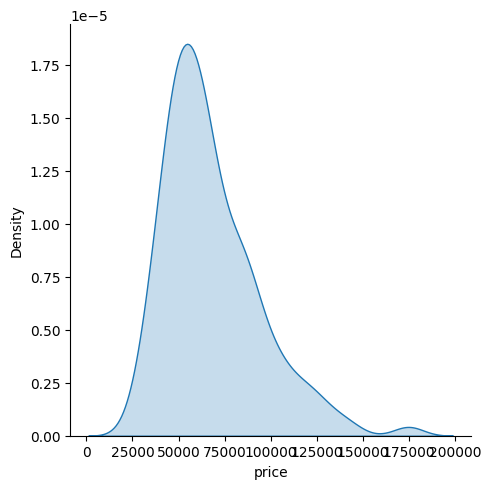

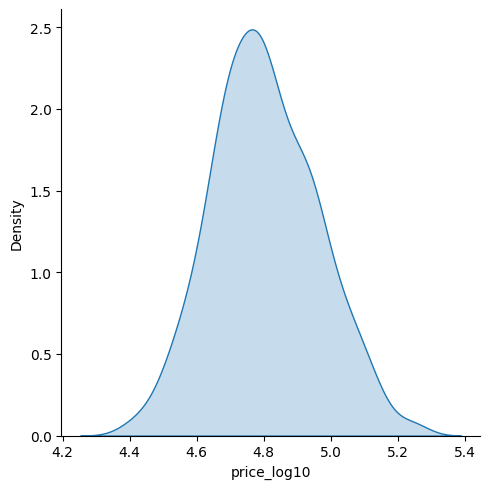

In [55]:
sns.displot(house_tr, x='price', kind='kde', fill=True)
plt.show()
house_tr['price_log10'] = np.log10(house_tr.price)
house_te['price_log10'] = np.log10(house_te.price)
sns.displot(house_tr, x='price_log10', kind='kde', fill=True)
plt.show()

#### 3.3. Sprawdź rozkład drugiej zmiennej  ciągłej - "lotsize".
* Zdecyduj, czy warto zmienić rozkład z pomocą logarytmowania?

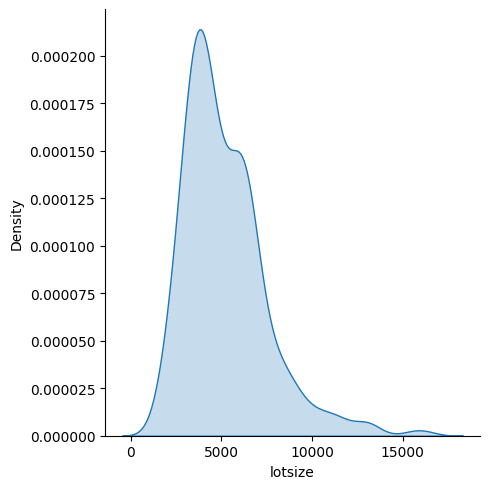

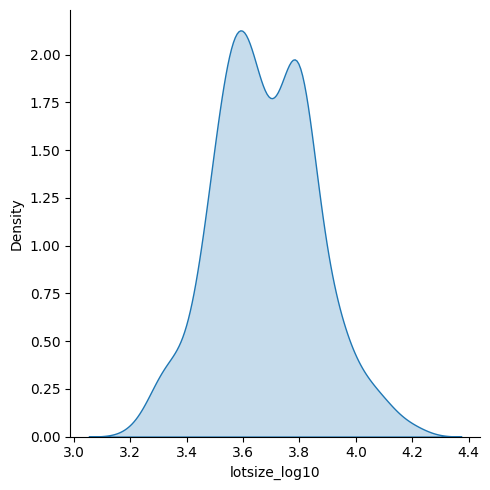

In [58]:
house_tr['lotsize_log10'] = np.log10(house_tr.lotsize)
house_te['lotsize_log10'] = np.log10(house_te.lotsize)
sns.displot(house_tr, x='lotsize', kind='kde', fill=True)
plt.show()
sns.displot(house_tr, x='lotsize_log10', kind='kde', fill=True)
plt.show()

#### 3.4. Zbuduj model "baseline", by mieć punkt odniesienia do kolejnych modeli. Zmierz wynik z użyciem `mean_squared_error`.

In [59]:
model_0 = ols(formula='price ~ 1',
              data=house_tr).fit()
print(model_0.summary())
pred_tr = model_0.predict(house_tr)
mse_tr = mean_squared_error(house_tr.price, pred_tr, squared=False)
print('MSE TR: {}'.format(np.round(mse_tr, 3)))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 03 Aug 2023   Prob (F-statistic):                nan
Time:                        15:57:19   Log-Likelihood:                -4169.6
No. Observations:                 360   AIC:                             8341.
Df Residuals:                     359   BIC:                             8345.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.784e+04   1368.669     49.567      0.0

#### 3.5. Na zbiorze uczącym sprawdź dopasowanie modelu z użyciem zmiennej "lotsize" w dwóch wariantach (z i bez logarytmowania) i zmiennej celu "price", również w dwóch wariantach.
* Porównaj wyniki osiągane na zbiorze uczącym (korzystając z MSE) i zdecyduj, na którym połączeniu powyższych zmiennych będziesz dalej modelować.

In [60]:
model_1_1 = ols(formula='price ~ lotsize',
              data=house_tr).fit()
print(model_1_1.summary())
pred_tr = model_1_1.predict(house_tr)
mse_tr = mean_squared_error(house_tr.price, pred_tr, squared=False)
print('MSE TR: {}'.format(np.round(mse_tr, 3)))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     148.2
Date:                Thu, 03 Aug 2023   Prob (F-statistic):           9.02e-29
Time:                        15:57:34   Log-Likelihood:                -4107.2
No. Observations:                 360   AIC:                             8218.
Df Residuals:                     358   BIC:                             8226.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.591e+04   2864.812     12.534      0.0

#### 3.6. Zbuduj macierz korelacji i zdecyduj, które zmienne dodać do modelu jako pierwsze.

In [62]:
house_tr.select_dtypes('number').corr()

,price,lotsize,bedrooms,bathrms,stories,garagepl,price_log10,lotsize_log10
price,1.000000,0.541122,0.378152,0.510102,0.451430,0.390008,0.971555,0.562838
lotsize,0.541122,1.000000,0.188963,0.206542,0.087757,0.333536,0.543466,0.959432
bedrooms,0.378152,0.188963,1.000000,0.384361,0.381994,0.143359,0.384384,0.179250
bathrms,0.510102,0.206542,0.384361,1.000000,0.361339,0.160395,0.475319,0.209289
stories,0.451430,0.087757,0.381994,0.361339,1.000000,0.057467,0.435493,0.114772
garagepl,0.390008,0.333536,0.143359,0.160395,0.057467,1.000000,0.371873,0.350305
price_log10,0.971555,0.543466,0.384384,0.475319,0.435493,0.371873,1.000000,0.578598
lotsize_log10,0.562838,0.959432,0.179250,0.209289,0.114772,0.350305,0.578598,1.000000


#### 3.7. Uzupełnij model o najlepsze zmienne kategoryczne. 
* Spróbuj dodawać różne zmienne kategoryczne i obserwuj podsumowanie modelu (p-values, ostrzeżenia o współliniowości i błąd predykcji - MSE).

#### 3.8. Sprawdź, czy występuje interakcja pomiędzy którąś z nich (zmiennych kategorycznych), już wybraną zmienną numeryczną i zmienną celu. 

In [63]:
model_2 = ols(formula='price ~ lotsize_log10 + bathrms + stories + garagepl',
              data=house_tr).fit()
print(model_2.summary())
pred_tr = model_2.predict(house_tr)
mse_tr = mean_squared_error(house_tr.price, pred_tr, squared=False)
print('MSE TR: {}'.format(np.round(mse_tr, 3)))
house_tr.dtypes
model_3 = ols(formula='price ~ lotsize_log10 + bathrms + stories + garagepl + prefarea',
              data=house_tr).fit()
print(model_3.summary())
pred_tr = model_3.predict(house_tr)
mse_tr = mean_squared_error(house_tr.price, pred_tr, squared=False)
print('MSE TR: {}'.format(np.round(mse_tr, 3)))
print(model_4.summary())
pred_tr = model_4.predict(house_tr)
mse_tr = mean_squared_error(house_tr.price, pred_tr, squared=False)
print('MSE TR: {}'.format(np.round(mse_tr, 3)))
model_5 = ols(formula='price ~ lotsize_log10 + bathrms + stories + garagepl + prefarea + airco + fullbase',
              data=house_tr).fit()
print(model_5.summary())
pred_tr = model_5.predict(house_tr)
mse_tr = mean_squared_error(house_tr.price, pred_tr, squared=False)
print('MSE TR: {}'.format(np.round(mse_tr, 3)))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     121.9
Date:                Thu, 03 Aug 2023   Prob (F-statistic):           2.43e-65
Time:                        15:59:17   Log-Likelihood:                -4014.0
No. Observations:                 360   AIC:                             8038.
Df Residuals:                     355   BIC:                             8057.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.883e+05   1.95e+04     -9.645

NameError: name 'model_4' is not defined

#### 3.9. Zbuduj finany model i sprawdź jego jakość. 

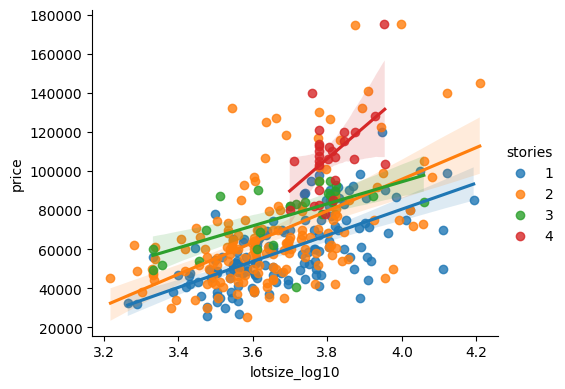

In [64]:
sns.lmplot(data=house_tr, x='lotsize_log10', y='price', hue='stories', aspect=1.3, height=4)
plt.show()